!jt -t chesterish
# !jt -r

In [20]:
from genetic_algorithm import *
from numpy.random import default_rng
from tqdm import tqdm
from itertools import product #combinations_with_replacement
import binascii
%matplotlib notebook

import matplotlib.pyplot as plt
import math
from matplotlib.animation import FuncAnimation

import copy
from collections import Counter
import pandas as pd

In [10]:
## hexadecimal generator

nr_of_input = 2
nr_of_actions = 5
nr_of_inner = 3
nr_of_genes = 8
nr_individuals = 400

individuals = generate_initial_genomes_for_population(nr_individuals, nr_of_genes, nr_of_input, nr_of_actions, nr_of_inner)

## world size
ws = 40
world_size_x = ws
world_size_y = ws

##TODo if world_size_x != world_size_y fit then limit coord_full_list 

coord_full_list = np.array(list(product(range(ws), repeat=2)))
ind = np.random.choice(len(coord_full_list), nr_individuals, replace=False)
pos = coord_full_list[ind]

## initial brain and position generator

result = calculate_individual_output_weights(individuals)

## add genome

for indiv in result:
    result[indiv]['genome'] = [i.hex_id for i in individuals[indiv]]
    
## assign position and remove brains without output

indiv_to_del = []
for indiv in result:
    if result[indiv]['out']:
        result[indiv]['position'] = [list(pos[indiv])]
    else:
        indiv_to_del.append(indiv)

for key in indiv_to_del:
    del result[key] 

In [11]:
nr_of_errors = 0

k = 40
n = 0
pbar = tqdm(total=k, initial=n)

while k>n: 
    pbar.update(1)
    for indiv in result:
        x, y = result[indiv]['position'][-1][0], result[indiv]['position'][-1][1]
        if n<1:
            calculate_position(result, indiv, x, y, world_size_x, world_size_y)    
        elif n >= 1:
            apply_input(result, indiv)
            calculate_position(result, indiv, x, y, world_size_x, world_size_y)
    last_pos_list = {obj:result[obj]['position'][-1] for obj in result}
#     print(last_pos_list)
#     print()
    prevent_overlap_movement(last_pos_list, result)

    n += 1
pbar.close()



  8%|██████▏                                                                            | 3/40 [00:22<04:41,  7.62s/it]

100%|██████████████████████████████████████████████████████████████████████████████████| 40/40 [00:56<00:00,  1.40s/it]


In [12]:
df = pd.DataFrame()
for key in result:
    df[key] = pd.Series(result[key]['position']).apply(lambda x: '.'.join((str(x[0]),str(x[1]))))

print(Counter(df.iloc[-1,:]).most_common(10))

# df

[('6.7', 1), ('1.38', 1), ('16.23', 1), ('37.21', 1), ('23.14', 1), ('1.22', 1), ('17.6', 1), ('0.40', 1), ('0.31', 1), ('40.33', 1)]


generate dictionary of coords 

In [13]:
coords = [{'x':[], 'y':[]} for key in range(len(result[indiv]['position']))]
for indiv in result:
    for pos_nr, pos in enumerate(result[indiv]['position']):
        coords[pos_nr]['x'].append(pos[0])
        coords[pos_nr]['y'].append(pos[1])

visualisation

<IPython.core.display.Javascript object>


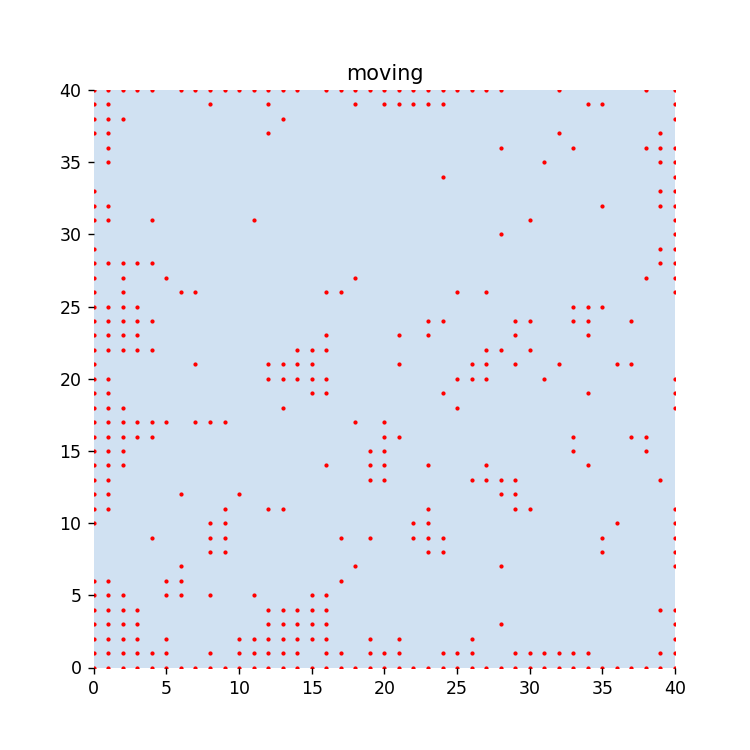

In [15]:
def update(i):
    ax.clear()
    ax.set_facecolor(plt.cm.Blues(.2))

    ax.set_xlim([0,world_size_x])
    ax.set_ylim([0,world_size_y])
    ax.set_title('moving')
    ax.scatter(x=coords[i]['x'],y=coords[i]['y'], c='red', s=2, marker='o')
    [spine.set_visible(False) for spine in ax.spines.values()] #remove chart 
    
fig, ax = plt.subplots(figsize=(6,6))
anime = FuncAnimation(
    fig = fig,
    func = update,
    frames = len(coords),
    interval = 10, repeat=False
)


### mutation

hexa to binary

In [48]:
binary = bin(int(result[0]['genome'][0], 16))[2:]
if len(binary) < 32:
    factor = 32 - len(binary)
    binary = '0' * factor + binary
print(binary, result[0]['genome'][0])

print(hex(int(binary, 2))[2:])

10001000010000100010000101011010 8842215a
8842215a


In [83]:
weight = 0.001
for i in range(10):
    ind = np.random.randint(0, len(binary))
    if int(binary[ind])==1:
        mutant = np.random.choice(2, 1, p=[weight, 1-weight])
        print('p0')
    else:
        mutant = np.random.choice(2, 1, p=[1-weight, weight])
        print('p1')
    
    binary_to_ints = [i for i in list(binary)]
    print(mutant)
    binary_to_ints[ind] = str(mutant[0])
    
    print(ind)
    print(''.join(binary_to_ints))  
    print(binary)
    print()

p1
[0]
3
10001000010000100010000101011010
10001000010000100010000101011010

p0
[1]
14
10001000010000100010000101011010
10001000010000100010000101011010

p1
[0]
13
10001000010000100010000101011010
10001000010000100010000101011010

p0
[1]
0
10001000010000100010000101011010
10001000010000100010000101011010

p0
[1]
9
10001000010000100010000101011010
10001000010000100010000101011010

p1
[0]
11
10001000010000100010000101011010
10001000010000100010000101011010

p1
[0]
5
10001000010000100010000101011010
10001000010000100010000101011010

p1
[0]
29
10001000010000100010000101011010
10001000010000100010000101011010

p1
[0]
6
10001000010000100010000101011010
10001000010000100010000101011010

p0
[1]
30
10001000010000100010000101011010
10001000010000100010000101011010



In [77]:
str(mutant[0])

'0'

['1',
 '0',
 '0',
 '0',
 '1',
 '0',
 '0',
 '0',
 '0',
 '1',
 '0',
 '0',
 '0',
 '0',
 '1',
 '0',
 '0',
 '0',
 '1',
 '0',
 '0',
 '0',
 '0',
 '1',
 '0',
 '1',
 '0',
 '1',
 '1',
 '0',
 '1',
 '0']

In [70]:
binary_to_ints

['1',
 '0',
 '0',
 '0',
 '1',
 '0',
 '0',
 '0',
 '0',
 '1',
 '0',
 '0',
 '0',
 '0',
 '1',
 '0',
 '0',
 '0',
 '1',
 '0',
 '0',
 '0',
 '0',
 '1',
 '0',
 '1',
 '0',
 '1',
 '1',
 '0',
 '1',
 '0']

In [58]:
[int(i) for i in list(binary)]

[1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0]